In [33]:
#### print('This runs')


import time
import scipy
import numpy as np
import pylab
import glob
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
yourpath = "C:/Users/Shyee/Deep Learning/data/train/train/*.jpg"
mytest="C:/Users/Shyee/Deep Learning/data/test/me/*.jpg"
# labelling
Ps = sorted(glob.glob(yourpath)) #path to your picture.jpg

## slicing dataset
one = Ps[132:] #from picture 133 to last SORTED picture
more = Ps[:132] # from picure one to 132
m = len(Ps)

dat=[] #list to append picture properties/features

for P in Ps:
    labels1 = np.ones(len(one)) # Picture of one person labelled 1
    labels2 = np.zeros(len(more)) # Picture of more than one people labelled 0
    orig_img=Image.open(P)
    img = orig_img.resize((64,64))
    arr = np.array(img)
    feature = arr.reshape(arr.size)
    dat.append(feature)
    
####################### Now  test data processing    
    
PsTest = (glob.glob(mytest))
meTest = PsTest[:40] # slicing
nmeTest = PsTest[40:]  # slicing
mTest=len(PsTest)
datTest=[]


for PTest in PsTest:
    labels1Test = np.ones(len(meTest))
    labels2Test = np.zeros(len(nmeTest))
    orig_imgTest=Image.open(PTest)
    imgTest = orig_imgTest.resize((64,64))
    arrTest = np.array(imgTest)
    featureTest= arrTest.reshape(arrTest.size)
    datTest.append(featureTest)
    


In [35]:

data = np.array(dat)

dataTest=np.array(datTest)

############### I use print() a lot to know the dimensions i'm working
print(len(Ps), len(PsTest))

#print(one[1])

print(len(more), len(one))
print(more[131])
print(labels2[131])
print(type(feature),type(dat),data.shape,type(data))
#print(labels1,labels2)   

print(nmeTest[36])
print(labels2Test[36])
print(type(featureTest),type(datTest),dataTest.shape,type(dataTest))
#print(labels1Test,labels2Test)

218 196
132 86
C:/Users/Shyee/Deep Learning/data/train/train\more (99).jpg
0.0
<class 'numpy.ndarray'> <class 'list'> (218, 12288) <class 'numpy.ndarray'>
C:/Users/Shyee/Deep Learning/data/test/me\not (132).jpg
0.0
<class 'numpy.ndarray'> <class 'list'> (196, 12288) <class 'numpy.ndarray'>


In [36]:
##### Yeah!!!  I explore my dataset well
print(data)
print(dataTest)

[[128 100  99 ..., 128  94  82]
 [150 153 144 ..., 117  85  88]
 [138 132  96 ..., 119  75  72]
 ..., 
 [190 159 130 ..., 255 255 255]
 [215 215 213 ...,  53 206 237]
 [235 240 244 ..., 227 159 120]]
[[255 255 255 ...,   5  84 117]
 [164 100  62 ...,  93  46  20]
 [117  67  44 ...,  96  51  20]
 ..., 
 [177 171 123 ..., 176  26 100]
 [196 190 158 ..., 231  74 191]
 [ 75  71  33 ...,  27  20   2]]


In [37]:
#   Normalizing or so its called

train_data = (data/255.).T

test_data = (dataTest/255.).T



In [38]:
print(train_data.shape, labels1.shape,labels2.shape)

print(test_data.shape, labels1Test.shape,labels2Test.shape)

(12288, 218) (86,) (132,)
(12288, 196) (40,) (156,)


In [39]:
#reshape>>>#data = data.reshape((data.shape[0], 1))

#combine labes and concatenate#>>> np.concatenate((a, b), axis=0)

labels1= labels1.reshape((labels1.shape[0], 1))
labels2= labels2.reshape((labels2.shape[0], 1))
Y = (np.concatenate((labels1, labels2), axis=0)).T #.................Y
print(Y.shape)


labels1Test= labels1Test.reshape((labels1Test.shape[0], 1))
labels2Test= labels2Test.reshape((labels2Test.shape[0], 1))
Y_Test = (np.concatenate((labels1Test, labels2Test), axis=0)).T #................Y_Test
print(Y_Test.shape)

(1, 218)
(1, 196)


In [40]:
X = train_data

X_Test = test_data


In [41]:
# Final dimensions of train data


print(X.shape,Y.shape,m)
print(type(X),type(Y))


test_x = X_Test
test_y = Y_Test

print(X_Test.shape,Y_Test.shape,mTest)
print(type(X_Test),type(Y_Test))




(12288, 218) (1, 218) 218
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12288, 196) (1, 196) 196
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [42]:
### CONSTANTS ###
layers_dims = [12288, 227, 7, 5, 1] #  5-layer model

In [43]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.007, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.694178
Cost after iteration 100: 0.500161
Cost after iteration 200: 0.356347


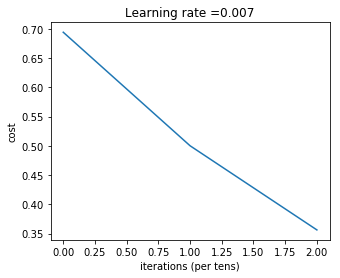

In [50]:
#parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
parameters = L_layer_model(X, Y, layers_dims, num_iterations = 250, print_cost = True)
#parameters = L_layer_model(test_x, test_y, layers_dims, num_iterations = 500, print_cost = True)



In [53]:
pred_train = predict(X, Y, parameters)

Accuracy: 0.894495412844


In [54]:
predictions_test = predict(X_Test, Y_Test, parameters)

Accuracy: 0.755102040816
